# Breast cancer Prediction Using Machine Learning

# Importing Libraries:

In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

# Loading Data:

In [3]:
df = pd.read_csv('../data/breast_cancer.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


# checking Dataset balance: 

In [4]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# Summary of the dataset:

In [30]:
# call the summarize function 
def summarize(df):
    print("Summary of the DataFrame:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("Column names:")
    print(df.columns.tolist())
    print("Data types of each column:")
    print(df.dtypes)
    print("Summary statistics:")
    print(df.describe())
    print(f"# of Numeric cols: {df.select_dtypes(include=[np.number]).shape[1]}")
    print(f"# of Categorical cols: {df.select_dtypes(exclude=[np.number]).shape[1]}")
summarize(df)

Summary of the DataFrame:
Number of rows: 569
Number of columns: 32
Column names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Data types of each column:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave poi

# Let's check what is this Unnamed column:

In [22]:
df['Unnamed: 32'].value_counts()

Series([], Name: count, dtype: int64)

Nothing is there in the Unnamed column, so we can drop it:

# Dropping Unnamed column:

In [29]:
df['Unnamed: 32'].isnull().sum() # check for null values in the last column
df.drop(columns=['Unnamed: 32'], inplace=True) # drop the last column

# Encoding Target variable:

In [31]:
df['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True) # convert diagnosis to binary values
df['diagnosis'].value_counts() # check the value counts again

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_11448\1208354010.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True) # convert diagnosis to binary values


diagnosis
0    357
1    212
Name: count, dtype: int64

In [34]:
df.head(3) # check the first 3 rows of the DataFrame

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# correlation matrix: with respect to target variable

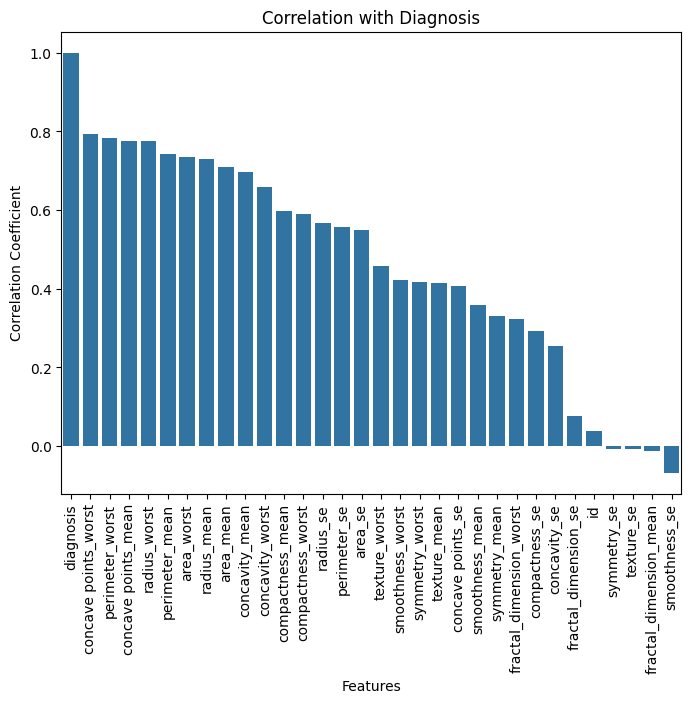

In [37]:
# correlation matrix with respect to the diagnosis column
corr = df.corr()['diagnosis'].sort_values(ascending=False) # calculate the correlation with respect to diagnosis
plt.figure(figsize=(8, 6)) # set the figure size
sns.barplot(x=corr.index, y=corr.values) # plot the barplot
plt.xticks(rotation=90) # rotate x-axis labels for better readability
plt.title('Correlation with Diagnosis') # set the title
plt.xlabel('Features') # set x-axis label
plt.ylabel('Correlation Coefficient') # set y-axis label
plt.show() # show the plot

# Splitting the dataset into train and test:

In [38]:
X = df.drop(columns=['diagnosis']) # drop the diagnosis column to get features
y = df['diagnosis'] # get the target variable -> (diagnosis)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the data into training and testing sets

In [41]:
print(f" Shape of X_train is: {X_train.shape},\nShape of X_test is: {X_test.shape},\nShape of y_train is {y_train.shape}, Shape of y_test is {y_test.shape}") # check the shapes of the training and testing sets

 Shape of X_train is: (455, 31),
Shape of X_test is: (114, 31),
Shape of y_train is (455,), Shape of y_test is (114,)


# Feature Scaling:

In [43]:
scaler = StandardScaler() # create a StandardScaler object

## fit the scaler on the training data and transform both the training and test data:

In [44]:
scaler.fit(X_train) # fit the scaler to the training data

StandardScaler()

In [45]:
X_train = scaler.transform(X_train) # transform the training data
X_test = scaler.transform(X_test) # transform the testing data

# Training the model:

In [47]:
lg = LogisticRegression() # create a LogisticRegression object

In [48]:
lg.fit(X_train, y_train) # fit the model to the training data

LogisticRegression()

In [49]:
y_pred = lg.predict(X_test) # make predictions on the testing data

## checking accuracy of the model:

In [50]:
accuracy_score(y_test, y_pred) # calculate the accuracy score

0.9736842105263158

# Save the model and scaler:

In [53]:
joblib.dump(lg, '../models/logistic_regression_model.pkl') # save the model to a file
joblib.dump(scaler, '../models/scaler.pkl') # save the scaler to a file


['../models/scaler.pkl']